# **TP_LQR_data**

# PART 1: Visualizing and pre-processing the data

***TASK 1***

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = 'two_movements.csv'

# Initialization of lists that will be useful later on
time1 = []
mov1 = []
time2 = []
mov2 = []
nb_line = 0
movem_1 = []
movem_2 = []
avg_mov = []

# Opening of the file
with open(path, "r") as _file : # open file in read (’r’) mode
    for line in _file : # iterate over each line
        # Get values from each line
        values = line.split (';')
        
        # Separate the two movements
        if nb_line < 380:
            if nb_line != 0 and nb_line != 1:
                time1.append(float(values[0]))
                mov1.append(float(values[1]))

        if nb_line >= 380 and nb_line < 605:
            if nb_line != 380:
                time2.append(float(values[0]))
                mov2.append(float(values[1]))

        nb_line += 1


***TASK 2***

In [3]:
# Discretization and interpolation for each trajectory
time1_new = np.arange(time1[0], time1[len(time1)-1], 0.01) # discretization of 10ms
mov1_new = np.interp(time1_new, time1, mov1)

time2_new = np.arange(time2[0], time2[len(time2)-1], 0.01)
mov2_new = np.interp(time2_new, time2, mov2)

time1 = time1_new
mov1 = mov1_new

time2 = time2_new
mov2 = mov2_new

movem_1 = [time1, mov1]
movem_2 = [time2, mov2]

# Print the two lists in a simple form
movem_1_rounded = [np.round(val, 2) for val in movem_1]
movem_2_rounded = [np.round(val, 2) for val in movem_2]
np.set_printoptions(suppress=True)
print("Movem_1:\n", np.array(movem_1_rounded))
print("\nMovem_2:\n", np.array(movem_2_rounded))


Movem_1:
 [[    2.37     2.38     2.39     2.4      2.41     2.42     2.43     2.44
      2.45     2.46     2.47     2.48     2.49     2.5      2.51     2.52
      2.53     2.54     2.55     2.56     2.57     2.58     2.59     2.6
      2.61     2.62     2.63     2.64     2.65     2.66     2.67     2.68
      2.69     2.7      2.71     2.72     2.73     2.74     2.75     2.76
      2.77     2.78     2.79     2.8      2.81     2.82     2.83     2.84
      2.85     2.86     2.87     2.88     2.89     2.9      2.91     2.92
      2.93     2.94     2.95     2.96     2.97     2.98     2.99     3.
      3.01     3.02     3.03     3.04     3.05     3.06     3.07     3.08
      3.09     3.1      3.11     3.12     3.13     3.14     3.15     3.16
      3.17     3.18     3.19     3.2      3.21     3.22     3.23     3.24
      3.25     3.26     3.27     3.28     3.29     3.3      3.31     3.32
      3.33     3.34     3.35     3.36     3.37     3.38     3.39     3.4
      3.41     3.42     3.43    

***TASK 3***

In order to compute the avarage, the two movement lists must have the same length. So firstly they are aligned in length.

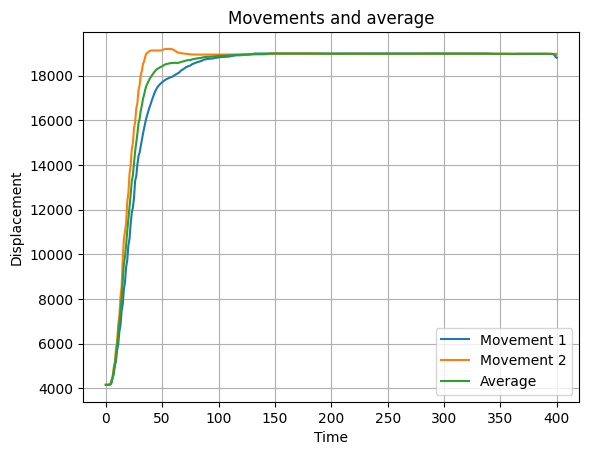

In [4]:
# "Synchronization" of the movements
diff = len(mov1)-len(mov2)
for i in range(diff):
    mov2 = np.append(mov2, mov2[len(mov2)-1])

# Computation of the average movement
for i in range(len(mov2)-1):
    avg_mov.append((mov1[i] + mov2[i])/2)

# Plot of the two movements and of the average
plt.plot(mov1, label = 'Movement 1')
plt.plot(mov2, label = 'Movement 2')
plt.plot(avg_mov, label = 'Average')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Movements and average')
plt.grid()
plt.show()


***TASK 4***

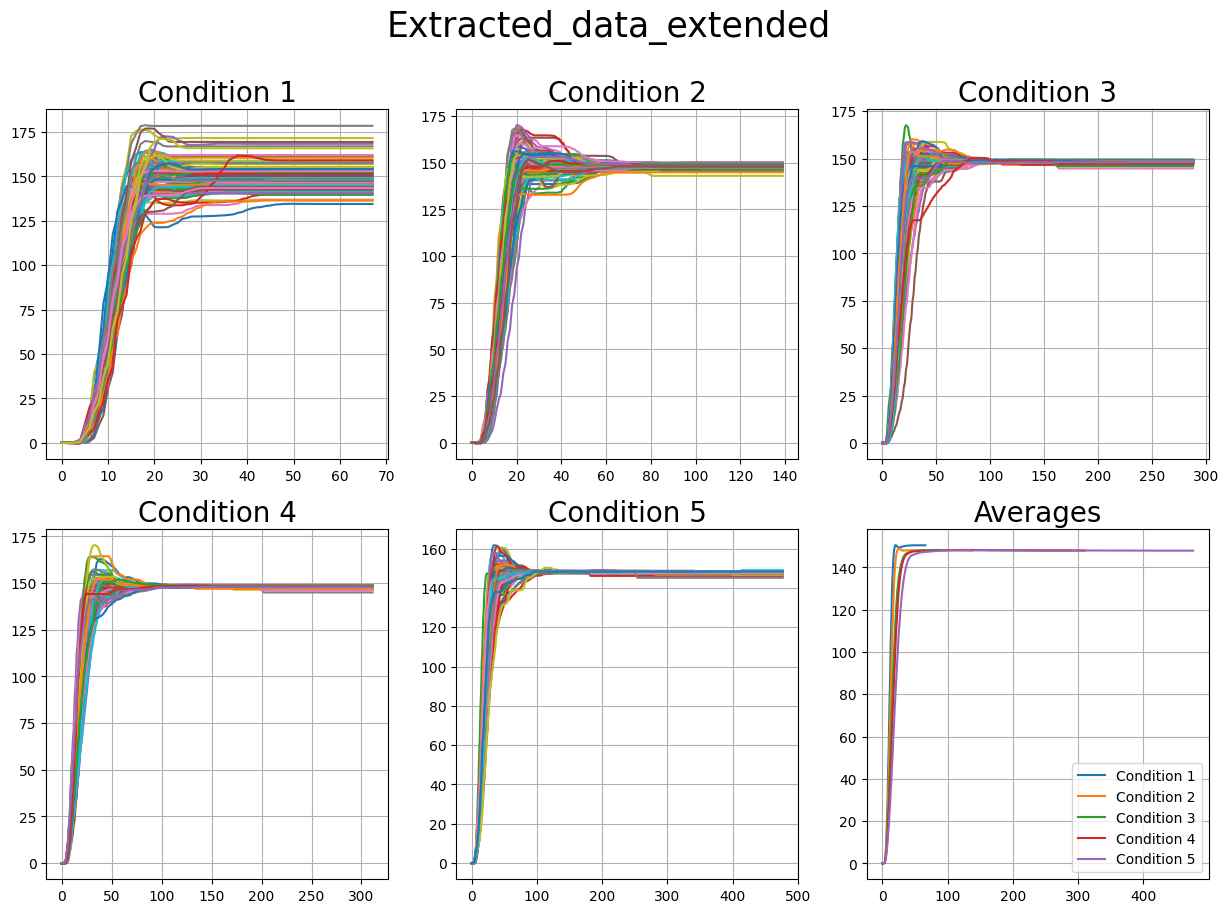

In [5]:
import pickle
import matplotlib.pyplot as plt

# Load the file as a Python Dictionary with 5 keys, corresponding to the 5 different conditions of the experiment. 
with open ("extracted_data_extended", "rb") as handle:
    dataset = pickle.load(handle)

# Every condition is rapresented by an array with different number of data
data_1 = dataset['1']
data_2 = dataset['2']
data_3 = dataset['3']
data_4 = dataset['4']
data_5 = dataset['5']

DATA = [data_1, data_2, data_3, data_4, data_5]

# Create the subplot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.suptitle('Extracted_data_extended', fontsize=25)

for i in range(5):
    for j in range(np.size(DATA[i], 0) -1):
        axes[i].plot(DATA[i][j,:])
    axes[i].set_title('Condition ' + str(i+1), fontsize = 20)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].grid()

# Computing the avarage for each condition
avg_1 = []
avg_2 = []
avg_3 = []
avg_4 = []
avg_5 = []

AVG = [avg_1, avg_2, avg_3, avg_4, avg_5]

# Plot of the average of each condition
for j in range(5):
    for i in range(np.size(DATA[j], 1) -1):
        AVG[j].append(np.mean(DATA[j][:,i]))

for j in range(len(AVG)):
    axes[5].plot(AVG[j], label = 'Condition ' + str(j+1))

axes[5].legend(fontsize = 10)
axes[5].set_title('Averages', fontsize = 20)
axes[5].tick_params(axis='x', labelsize = 10)
axes[5].tick_params(axis='y', labelsize = 10)
axes[5].grid()


***TASK 5***

As it's possible to notice in the graphs, the average movement levels off at 150. For the condition 1 there is a visible bigger variability, but the average value is around 150. 


# PART 2: Single-joint forearm dynamics

***TASK 6***

![Schermata 2023-12-12 alle 14.06.52.png](<attachment:Schermata 2023-12-12 alle 14.06.52.png>)
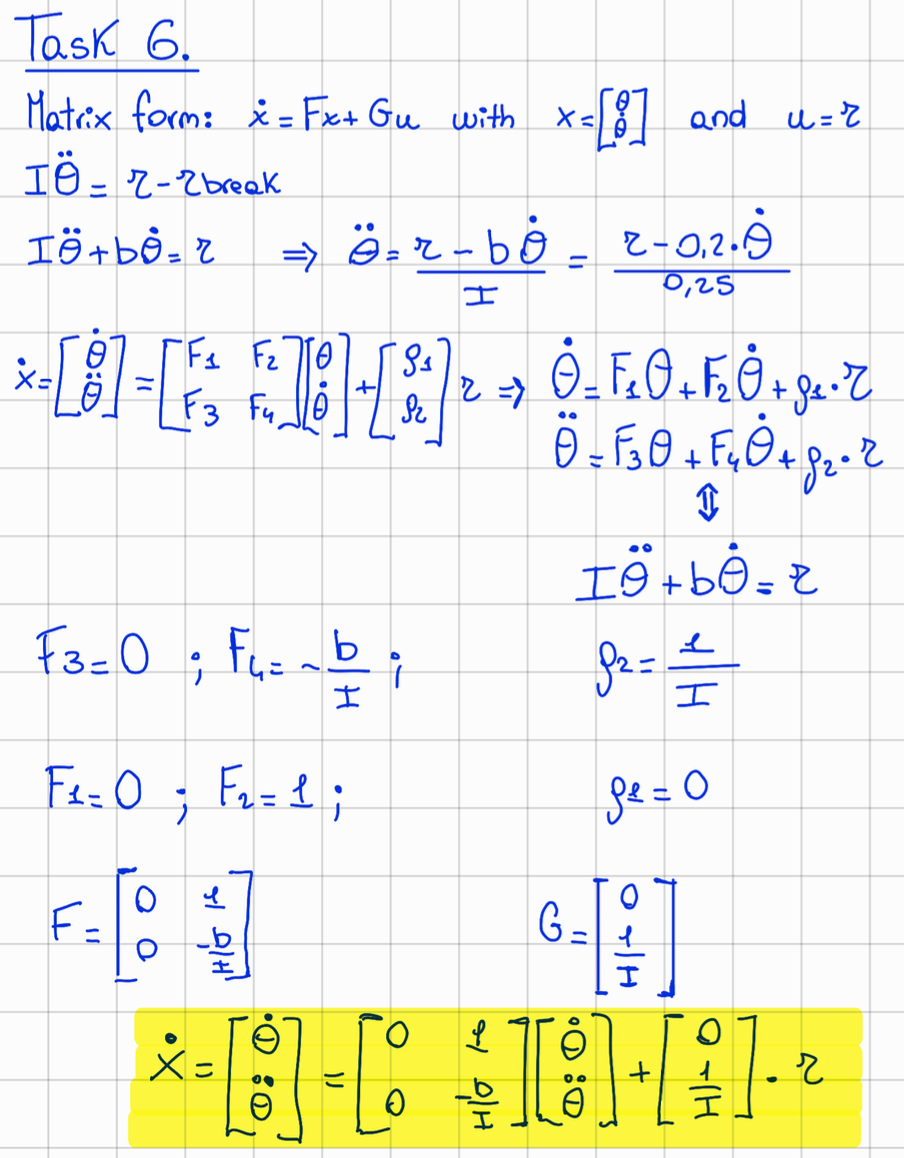

***TASK 7***

![Schermata 2023-12-12 alle 14.07.30.png](<attachment:Schermata 2023-12-12 alle 14.07.30.png>)
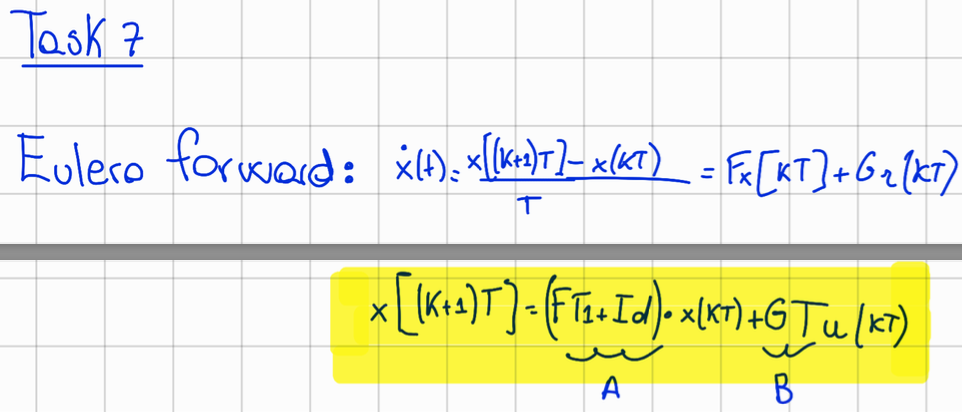

# PART 3: Linear Quadratic Regulator

**Main assumption**: The human behavior is the one that minimizes a cost function. This type of control is called *optimal control*.

***TASK 8***

![Schermata 2023-12-12 alle 14.08.21.png](<attachment:Schermata 2023-12-12 alle 14.08.21.png>)
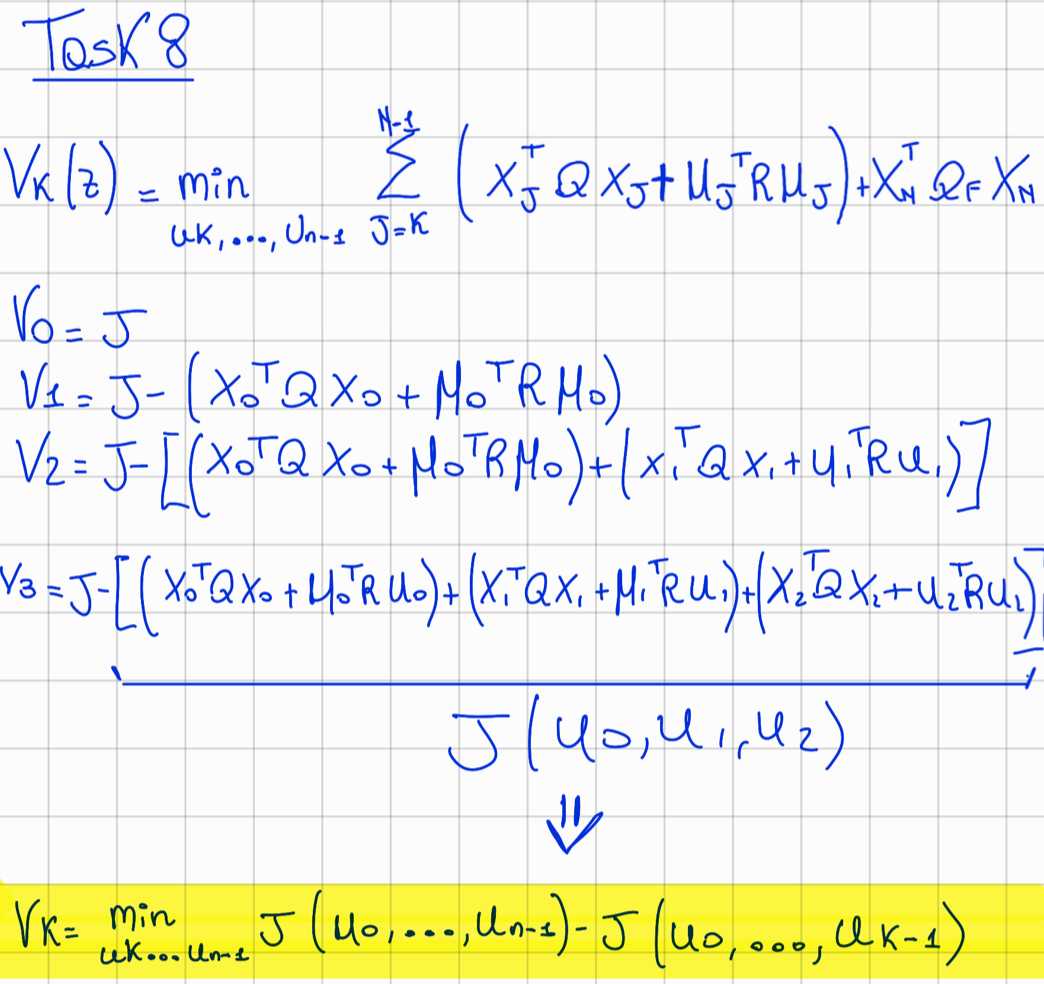

# PART 4: LQR and Real Data

***TASK 9***

In [6]:
# Function to solve the LQR
def LQR(x_0, Q, R, A, B, C, N):

    Qf = Q

    # Computation of P
    P_inv = [Qf]
    
    for i in range(N-1):
        P_k = P_inv[i]
        inv_term = np.linalg.pinv(R + B.T @ P_k @ B)
        P_kminone = Q + A.T @ P_k @ A - (A.T @ P_k @ B) @ inv_term @ (B.T @ P_k @ A)      
        P_inv.append(P_kminone)
        
    P = P_inv[::-1]

    # Computation of K
    K = [-np.linalg.inv(R + B.T @ pk @ B) @ B.T @ pk @ A for pk in P]

    # Initialization of x, y, u and J components
    x = [x_0]
    y = [C @ x_0]
    u = []
    cost_x = []
    cost_u = []

    # Computation of x, y, u and J components
    for k in K:
        u.append(k @ x[-1])
        cost_u.append((k @ x[-1]).T @ R @ (k @ x[-1]))
        cost_x.append(x[-1].T @ Q @ x[-1])
        xnext = A @ x[-1] + B @ u[-1]
        x.append(xnext)
        y.append(C @ x[-1])

    return P, K, u, x, y, cost_x, cost_u

***TASK 10***

Cost function J = 0.3056624307241365

 



/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/290294050.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]
/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/290294050.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_plot = [float(u) for u in u_list]


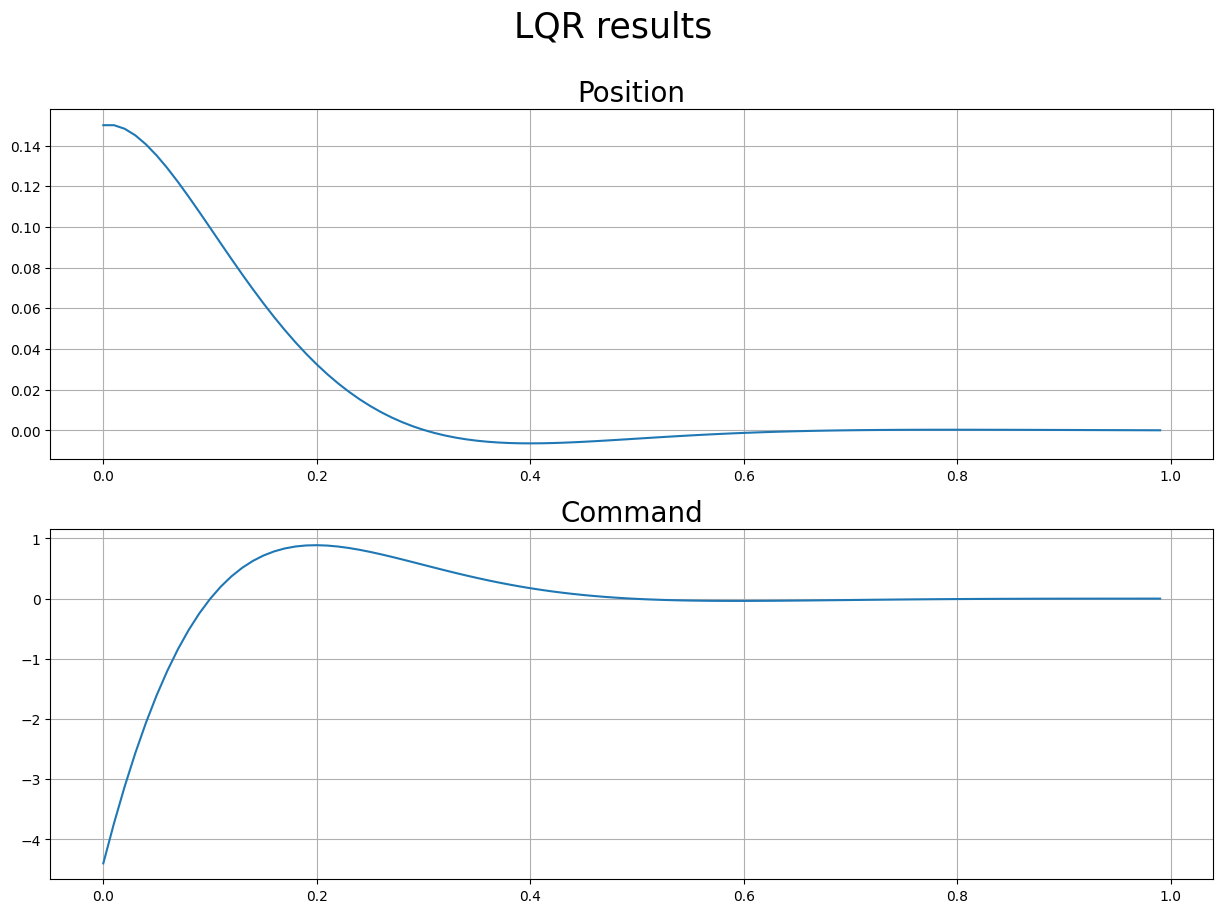

In [7]:
# Initialization of parameters
N = 100
rho = 0.001
b = 0.2
I = 0.25
T = 0.01
C = np.array([[1, 0]])
R = rho*np.eye(1)
Q = C.T @ C
Qf = Q
B = np.array([[0],[T/I]])
A = np.array([[1, T],[0, 1-T*b/I]])
x_0 = np.array([[0.15],[0]])

# Call the function LQR
P, K, u_list, x_list, y_list, cost_x, cost_u = LQR(x_0, Q, R, A, B, C, N)

# Computation of J
J = np.sum(cost_x) + np.sum(cost_u)
print('Cost function J = ' +str(J))
print("\n \n")

# Cast to float
y_plot = [float(y) for y in y_list]
u_plot = [float(u) for u in u_list]

# Plot of y and u
time =[num * T for num in range(0, N)] 
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('LQR results', fontsize=25)
axs[0].plot(time, y_plot[0:len(time)])
axs[1].plot(time, u_plot)
axs[0].set_title('Position', fontsize = 20)
axs[1].set_title('Command', fontsize = 20)
axs[0].grid()
axs[1].grid()
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)


The function takes as input: 
* **x_0**: initial state;
* **Q**: matrix that defines the weights on the states;
* **R**: matrix that defines the weights on the control input;
* **A**: the state-transition matrix;
* **B**: the control matrix;
* **C**: needed to compute *Q*;
* **N**: number of timesteps. 
#
And returns: 
* **P**: needed to compute *V* --> **V**: the optimal cost;
* **K**: needed to compute the optimal action;
* **u**, **x**, **y**: the position component;
* **cost_x**, **cost_u**: the two components of *J* --> **J**: the quadratic cost function to be minimized.

#
From the graph it is possible to see the trajectories simulated resulting from the optimal control law by the LQR. The plots rapresent the Position and the Command input (respectively, y and u) as function of time.
The steady state value reached is 0, es expected.

***TASK 11***

/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/3126124006.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]
/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/3126124006.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_plot = [float(u) for u in u_list]


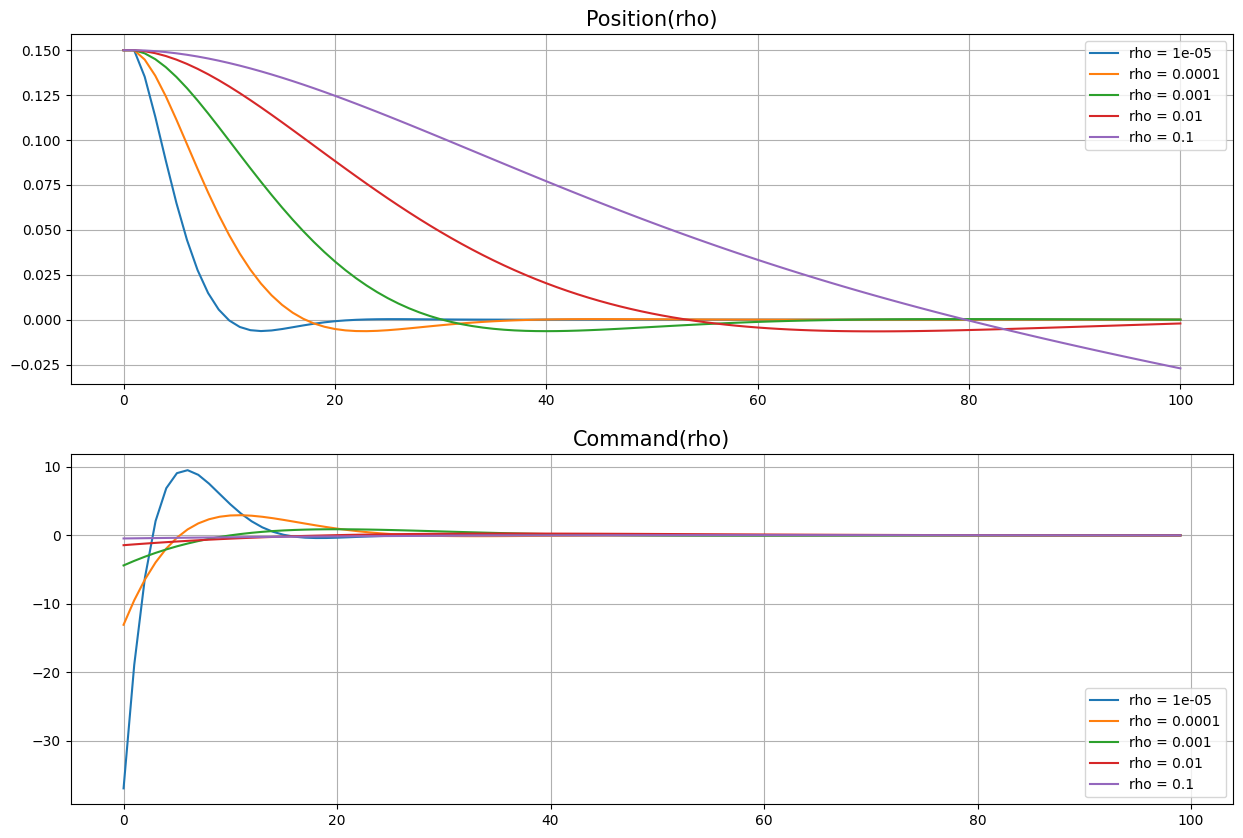

In [8]:
# Considered rho values
rho = [0.00001, 0.0001, 0.001, 0.01, 0.1]

# Preparation of the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
i = 0
J = []
for r in rho:
    # Computation of the new R
    R = r * np.eye(1)

    # Call the LQR function
    P, K, u_list, x_list, y_list, cost_x, cost_u = LQR(x_0, Q, R, A, B, C, N)

    # Collect J
    J.append(np.sum(cost_x) + np.sum(cost_u))

    # Cast to float
    y_plot = [float(y) for y in y_list]
    u_plot = [float(u) for u in u_list]

    # Plot y and u for different values of rho in two subplots
    axs[0].plot(list(range(len(y_plot))), y_plot, "-", label='rho = ' + str(r))
    axs[1].plot(list(range(len(u_plot))), u_plot, "-", label='rho = ' + str(r))
    axs[0].legend(fontsize = 10)
    axs[1].legend(fontsize = 10)
    axs[0].tick_params(axis='x', labelsize=10)
    axs[0].tick_params(axis='y', labelsize=10)
    axs[1].tick_params(axis='x', labelsize=10)
    axs[1].tick_params(axis='y', labelsize=10)
    axs[0].set_title('Position(rho)', fontsize=15)
    axs[1].set_title('Command(rho)', fontsize=15)
    axs[0].grid()
    axs[1].grid()


As reported by the plots, the *rho* parameter manages the trade off between aggressiveness and robustness. In fact, by increasing *rho* the Control action gets slower, and the steady state value needs more time to be reached. On the other hand, by decreasing *rho* the Control action gets faster and so the steady state value is reached more abruptely. 
The best performance is obtained by an avarage value of *rho*. 

The reason behind this behavior is because *rho* is in fact the R parameter, which is the weight of the control signal component of the cost function. 

***TASK 12***

In [9]:
# Computation of the final value of each average trajectory (used later)
m1 = avg_1[len(avg_1)-1]
m2 = avg_2[len(avg_2)-1]
m3 = avg_3[len(avg_3)-1]
m4 = avg_4[len(avg_4)-1]
m5 = avg_5[len(avg_5)-1]

# Initialization of the new lists containing the translated averages (steady state value = 0)
avg_1_to0 = []
avg_2_to0 = []
avg_3_to0 = []
avg_4_to0 = []
avg_5_to0 = []

# Translation of each curve
for i in range(0,len(avg_1)-1):
    avg_1_to0 = np.append(avg_1_to0, avg_1[i] - m1)
for i in range(0,len(avg_2)-1):
    avg_2_to0 = np.append(avg_2_to0, avg_2[i] - m2)
for i in range(0,len(avg_3)-1):
    avg_3_to0 = np.append(avg_3_to0, avg_3[i] - m3)
for i in range(0,len(avg_4)-1):
    avg_4_to0 = np.append(avg_4_to0, avg_4[i] - m4)
for i in range(0,len(avg_5)-1):
    avg_5_to0 = np.append(avg_5_to0, avg_5[i] - m5)

avgs = [avg_1_to0, avg_2_to0, avg_3_to0, avg_4_to0, avg_5_to0]


In [10]:
# Function needed by the optimization algorithm: first argument = rho
def LQR_norm(rho, mean):

    #initialization of parameters
    N = len(mean)-1
    R = rho * np.eye(1)
    x_0 = np.array([[mean[0]],[0]])

    # Call the LQR function
    P, K, u_list, x_list, y_list, cost_x, cost_u = LQR(x_0, Q, R, A, B, C, N)
    
    # Cast to float
    y_plot = [float(y) for y in y_list]
    
    # Computation of the norm between the two trajectories (mean and LQR)
    diff = mean - y_plot
    norm = np.linalg.norm(diff)
    return norm

# Collecting the norm of the difference between average and LQR with non optimized rho
NORM_preopt = []
for mean in avgs:
    norm = LQR_norm(0.001, mean)
    NORM_preopt.append(norm)
    

/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/1161769677.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]


/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/1161769677.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]
/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/1161769677.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]
/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/2492160882.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [

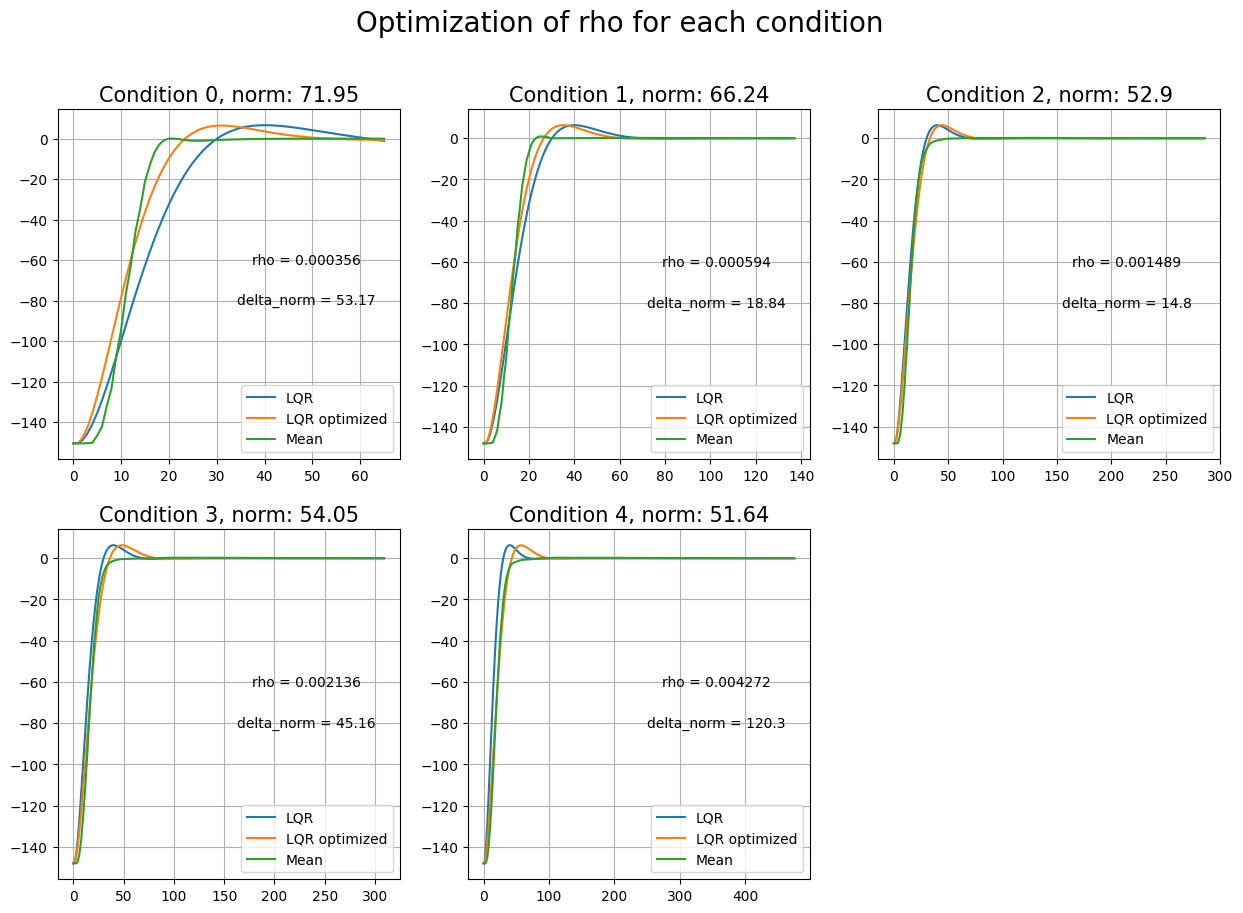

In [11]:
import scipy

RHO = []
NORM = []
delta_norm = []

# Initialization of parameters
b = 0.2
I = 0.25
T = 0.01
C = np.array([[1, 0]])
Q = C.T @ C
Qf = Q
B = np.array([[0], [T/I]])
A = np.array([[1, T],[0, 1-T*b/I]])

# Preparation of the figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5]
fig.suptitle('Optimization of rho for each condition', fontsize=20)

# Plot of the average, LQR non optimized and LQR optimized for each condition
for i in range(5):
    # Initialization of parameters
    N = len(avgs[i])-1
    R = 1e-3*np.eye(1)
    x_0 = np.array([[avgs[i][0]], [0]])

    # Find the optimized rho
    result = scipy.optimize.minimize(LQR_norm, 0.1, (avgs[i]))
    rho_opt = result.x[0]
    norm_opt = result.fun
    RHO = np.append(RHO, rho_opt)
    NORM = np.append(NORM, norm_opt)

    R_opt = rho_opt*np.eye(1)

    # Call to LQR with non optimized and optimized rho (respectively)
    P, K, u_list, x_list, y_list, cost_x, cost_u = LQR(x_0, Q, R, A, B, C, N)
    P, K, u_list, x_list, y_list_opt, cost_x_opt, cost_u_opt = LQR(x_0, Q, R_opt, A, B, C, N)
    
    # Cast to float
    y_plot = [float(y) for y in y_list]
    y_plot_opt = [float(y) for y in y_list_opt]

    # Plot the two curves
    axes[i].plot(y_plot, label = 'LQR')
    axes[i].plot(y_plot_opt, label = 'LQR optimized')
    axes[i].plot(avgs[i], label = 'Mean')
    axes[i].set_title('Condition ' + str(i) + ', norm: '+ str(round(norm_opt, 2)), fontsize = 15)
    axes[i].legend(fontsize = 10)
    axes[i].grid()
    axes[i].tick_params(axis='x', labelsize = 10)
    axes[i].tick_params(axis='y', labelsize = 10)

    # Display the value of the optimized rho
    axes[i].text(3/4*N, -60, 'rho = ' + str(round(rho_opt,6)), horizontalalignment='center', verticalalignment='center', fontsize = 10)
    
    # Display the improvement in the norm with respect to the non optimized case
    axes[i].text(3/4*N, -80, 'delta_norm = ' + str(round((NORM_preopt[i]-norm_opt),2)), horizontalalignment='center', verticalalignment='center', fontsize = 10)
    
fig.delaxes(ax6)


***TASK 13***

/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/1161769677.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]
/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/1161769677.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [float(y) for y in y_list]
/var/folders/np/zmncv3nx4nq_nlccq6r0rxl00000gn/T/ipykernel_10908/2305698934.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_plot = [

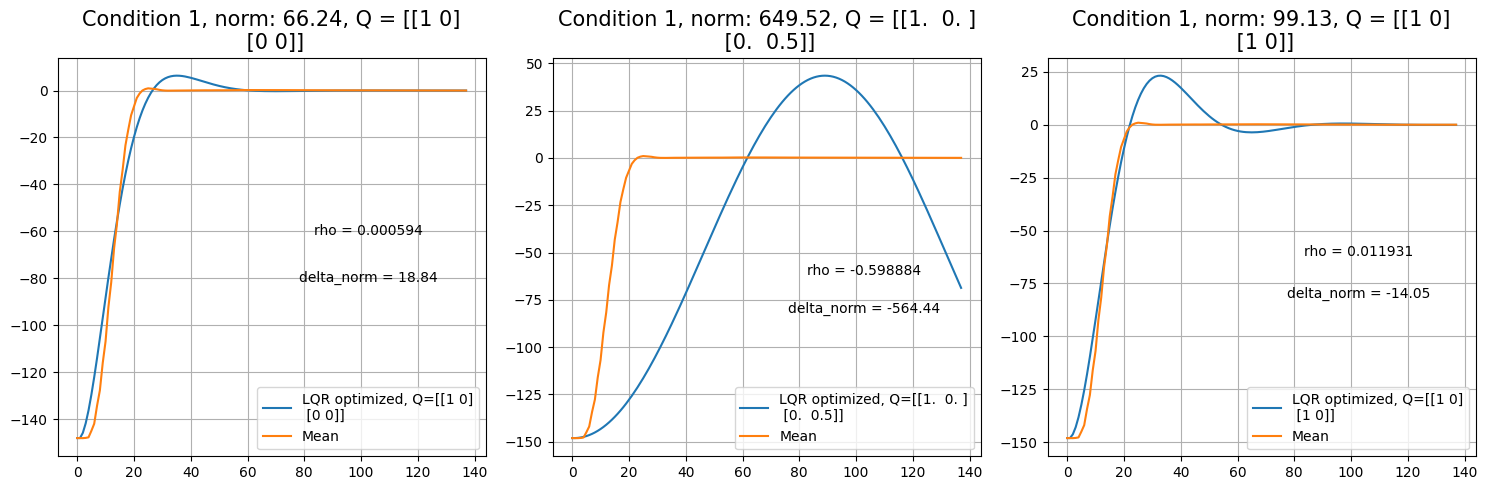

In [18]:
import scipy

# List of different Q values to test
Q_values = [np.array([[1, 0], [0, 0]]), np.array([[1, 0], [0, 0.5]]), np.array([[1, 0], [1, 0]])]

# Create a subplot with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over different Q values
for idx, Q in enumerate(Q_values):
    delta_norm = []

    # Initialization of parameters
    b = 0.2
    I = 0.25
    T = 0.01
    C = np.array([[1, 0]])
    Qf = Q
    B = np.array([[0], [T/I]])
    A = np.array([[1, T], [0, 1-T*b/I]])

    # Plot of the average, LQR non optimized and LQR optimized for each condition
    i = 1
    # Initialization of parameters
    N = len(avgs[i])-1
    R = 1e-3*np.eye(1)
    x_0 = np.array([[avgs[i][0]], [0]])

    # Find the optimized rho
    result = scipy.optimize.minimize(LQR_norm, 0.1, (avgs[i]))
    rho_opt = result.x[0]
    norm_opt = result.fun

    R_opt = rho_opt*np.eye(1)

    # Call to LQR with non optimized and optimized rho (respectively)
    P, K, u_list, x_list, y_list, cost_x, cost_u = LQR(x_0, Q, R, A, B, C, N)
    P, K, u_list, x_list, y_list_opt, cost_x_opt, cost_u_opt = LQR(x_0, Q, R_opt, A, B, C, N)

    # Cast to float
    y_plot = [float(y) for y in y_list]
    y_plot_opt = [float(y) for y in y_list_opt]

    # Plot the two curves on the current subplot
    axs[idx].plot(y_plot_opt, label='LQR optimized, Q=' + str(Q))
    axs[idx].plot(avgs[i], label='Mean')
    axs[idx].set_title('Condition ' + str(i) + ', norm: ' + str(round(norm_opt, 2)) + ', Q = ' + str(Q), fontsize=15)
    axs[idx].legend(fontsize=10)
    axs[idx].grid()

    # Display the value of the optimized rho
    axs[idx].text(3/4*N, -60, 'rho = ' + str(round(rho_opt, 6)), horizontalalignment='center', verticalalignment='center', fontsize=10)

    # Display the improvement in the norm with respect to the non-optimized case
    axs[idx].text(3/4*N, -80, 'delta_norm = ' + str(round((NORM_preopt[i]-norm_opt), 2)), horizontalalignment='center', verticalalignment='center', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



* With the first value of Q used, the fit has improved as the norm has decreased. 
* With the second value of Q the performance is worse as the norm is high. 
* With the third value of Q the performance is still bad but better than the second case. 

# PART 5: Bonus

***TASK 14***

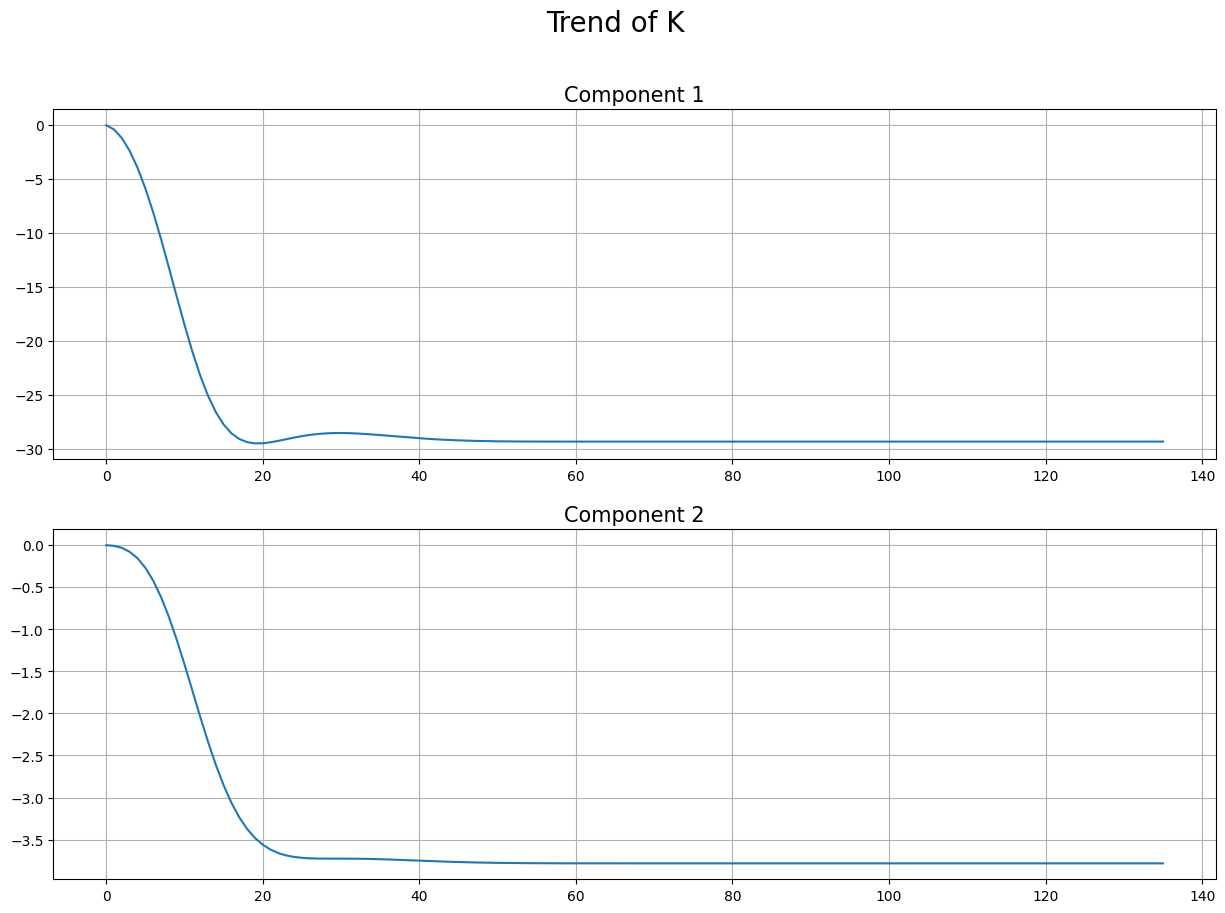

In [13]:
C = np.array([[1, 0]])
Q = C.T @ C

# Compute K with LQR algorithm
P_lqr, K_lqr, u, x, y, cost_x, cost_u = LQR(x_0, Q, R, A, B, C, N)

# Preparation of the figure
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(15, 10))
axes = [ax1, ax2]
fig.suptitle('Trend of K', fontsize=20)
Kinv = K_lqr[::-1]

# Variable to switch axes
l = 0

for k in [0,1]:
    p = []
    # Each value in position j of the vector is collected and plotted
    for i in range(len(Kinv)-1):
        p = np.append(p, Kinv[i][0][k])

    axes[l].plot(p)
    axes[l].set_title('Component '+str(l+1), fontsize = 15) 
    axes[l].grid()
    axes[l].tick_params(axis='x', labelsize = 10)
    axes[l].tick_params(axis='y', labelsize = 10)
    l += 1


By changing the value of Q the plots converge to different values and with different velocities. 

By changing the N, no significant changings are detected.